### ⏰ Exercise
Plot the profile of the gaussian kernel at its midpoint, i.e. the values under the line shown here:
Think about what you would expect to see.

(44.00, 0.00)

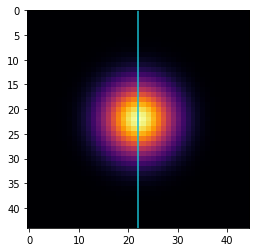

In [ ]:
fig, ax = plt.subplots()

ax.imshow(kernel, cmap='inferno')
ax.vlines(22, -100, 100, color='C9')
ax.set_ylim((sidelen - 1, 0))

Text(0, 0.5, 'Kernel value')

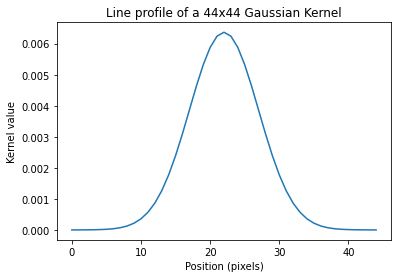

In [ ]:

fig, ax = plt.subplots()
ax.plot(kernel[22,:])
plt.title('Line profile of a 44x44 Gaussian Kernel')
# always label the axis ;)
plt.xlabel('Position (pixels)')
plt.ylabel('Kernel value')


Did it match your expectations?

### ⏰Exercise: The Convolution Theorem
As we investigated, it is also possible to do convolutions using Fourier transforms, and in some cases this is the preferable method. In fact, there is some body of work investigating the use of ffts and multiplication to do convolution operations in convolutional neural networks. 

To illustrate this theorem, given a convolutional kernel you will find the corresponding Fourier operation that produces the same result. 

In this exercise you should:

1. create a 7x7 Gaussian kernel with a standard deviation $\sigma=2$ (using a pixel grid spacing of 1)
2. load an image, if it is color then convert it to grayscale (you can just sum the 3 color channels), and then resize the image into a 128x128 array
3. compute the convolution  - you can use a numpy (np) or scipy function. Make sure the output is the same size as the input image, which is slightly different than the formal definition of a discrete convolution, but is something that is usually convenient to do.
4. Find the Fourier filter that does the same operation in the Fourier domain, and show the resulting blurred image implemented using the Fourier method (i.e., if $I_{2}=I_{1}*h$, then $\mathcal{F}[I_{2}]=\mathcal{F}[I_{1}]\mathcal{F}[h]$, so find the correct array for $\mathcal{F}[h]$ and re-generate $I_2$). 

(7, 7)
(128, 128)
(128, 128)


NameError: ignored

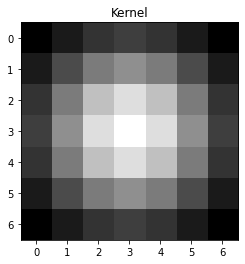

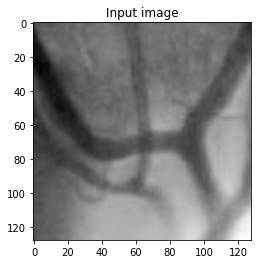

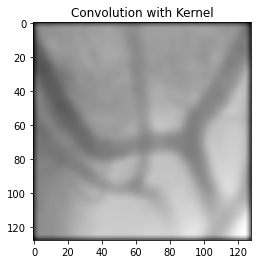

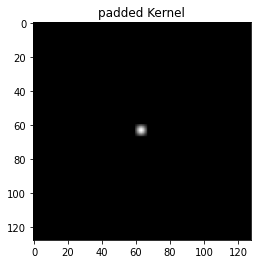

In [ ]:
import skimage
from PIL import Image
from scipy.signal import convolve2d


kernel_sigma = 2
image_size = 128
sidelen = 7

## 1 the Gaussian kernel
spot = np.zeros((sidelen, sidelen), dtype=float)
spot[sidelen // 2, sidelen // 2] = 1
kernel = filters.gaussian(spot, sigma=kernel_sigma)
fig, ax = plt.subplots()
ax.imshow(kernel)
plt.title('Kernel')
print(kernel.shape)

## 2 load an image, grayscale 128x128
image = skimage.data.retina()
image = np.sum(image,axis=-1)
image = image[500:500+image_size,100:100+image_size]

print(image.shape)
fig, ax = plt.subplots()
ax.imshow(image)
plt.title('Input image')

## 3 convolution
image_conv = convolve2d(image, kernel, mode='same')
print(image_conv.shape)
fig, ax = plt.subplots()
ax.imshow(image_conv)
plt.title('Convolution with Kernel')


## 4 Fourier filter
# zero pad filter:
kernel_padded = np.pad(kernel, (60,61), mode='constant', constant_values=0)
fig, ax = plt.subplots()
ax.imshow(kernel_padded)
plt.title('padded Kernel')

# FFTs:
image_fft = np.fft.fft2(image) # 2D fft
kernel_fft = np.fft.fft2(kernel_padded)
# FFT shift
grayscale_fft_shifted = np.fft.fftshift(image_fft) # corrected FFT
kernel_fft_shifted = np.fft.fftshift(kernel_fft) # corrected FFT
# filtering: convoltion in image space is multiplication in fourier space
image_fft_filtered = kernel_fft_shifted*grayscale_fft_shifted
# get ampl and phase
amplitude = np.abs(image_fft_filtered) # amplitude is the absolute value of the transform
phase = np.angle(image_fft_filtered) # the phase of the transform
# reverse FFT
inverse = np.fft.ifft2(np.fft.ifftshift(image_fft_shifted))
grayscale_from_inverse = np.abs(inverse)
# plotting
fig, ax = plt.subplots()
ax.imshow(grayscale_from_inverse)
plt.title('Fitered in FFT')

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(image, cmap="gray")
axs[0, 0].set_title('Original')
axs[0, 1].imshow(grayscale_from_inverse, cmap="gray")
axs[0, 1].set_title('Filtered after FFT')
axs[1, 0].imshow(np.log(amplitude))
axs[1, 0].set_title('Amplitude of FFT filter')
axs[1, 1].imshow(phase)
axs[1, 1].set_title('Phase of FT filtered image')

#### Difference filters in 2D

For images, you can think of an edge as points where the gradient is large in one direction. We can approximate gradients with difference filters.

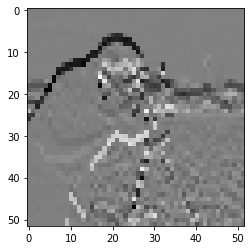

In [ ]:
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

gradient_vertical = ndi.correlate(pixelated.astype(float),
                                  vertical_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_vertical);

### ⏰ Exercise

- Add a horizontal kernel to the above example to also compute the horizontal gradient, $g_y$
- Compute the magnitude of the image gradient at each point: $\left|g\right| = \sqrt{g_x^2 + g_y^2}$

Text(0.5, 1.0, 'Gradient Magnitude')

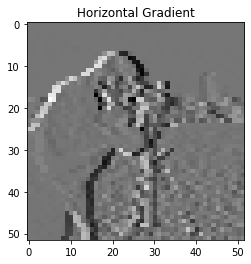

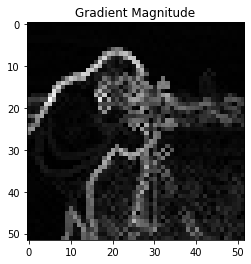

In [ ]:
horizontal_kernel = np.array([
    [1, 0, -1]])


gradient_horizontal = ndi.correlate(pixelated.astype(float),
                                  horizontal_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_horizontal);
ax.set_title("Horizontal Gradient")

magnitude = gradient_horizontal**2 + gradient_vertical**2
magnitude = np.sqrt(magnitude)
fig, ax = plt.subplots()
ax.imshow(magnitude)
ax.set_title("Gradient Magnitude")